In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Food Example

## Import df

In [22]:
sheet_id = '1goqktYEUI2BSk_sxPsNxU3QfMn_8zohcJCzDZ0b61xs'
sheet_name = 'DS008'
url =  f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
df = pd.read_csv(url, index_col='student', nrows=14)
df.drop(['age','favorite_color'], axis=1, inplace=True)
df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
student,,,,,,,,,
Alex,8,9,2,9,6,7,8,9,9
Christopher,8,8,5,3,4,5,10,10,8
Iuri,8,7,5,3,3,5,6,8,1
Jacqueline,7,8,8,3,0,7,8,10,3
Jari,7,8,9,1,2,6,8,3,2
Mo,0,0,7,0,8,4,9,3,4
Levent,7,9,6,2,4,5,10,10,0
Natalia,10,7,6,0,5,7,9,0,0
Radka,9,8,0,0,6,1,8,0,3


## manual Calc euclidean distances

<AxesSubplot:xlabel='student', ylabel='student'>

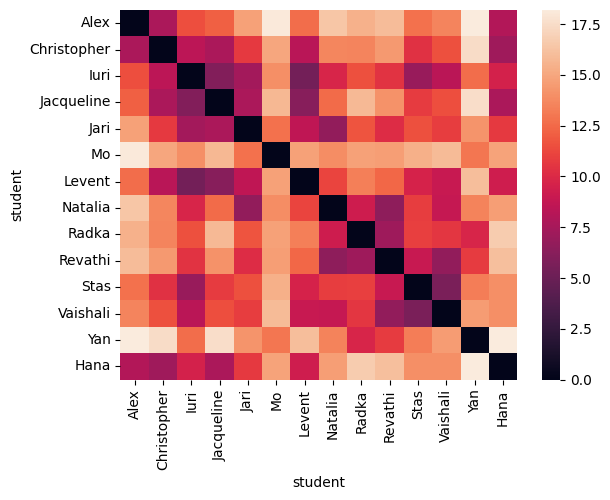

In [36]:
all_distances = []
for student_a in df.index:
    student_a_food = []
    for i in range(len(df.columns)):
        student_a_food.append(df.loc[student_a, df.columns[i]])
    student_a_dis =[]
    for student_b in df.index:
        student_b_food = []
        for i in range(len(df.columns)):
            student_b_food.append(df.loc[student_b, df.columns[i]])
        squares = [(student_a_food[i] - student_b_food[i])**2 for i in range(len(df.columns))]
        e_dist = sum(squares)**0.5
        student_a_dis.append(e_dist)
    all_distances.append(student_a_dis)

euclidean_df = pd.DataFrame(all_distances, index=df.index, columns=df.index)
sns.heatmap(euclidean_df)

## automatic Calc euclidean distances


<AxesSubplot:xlabel='student', ylabel='student'>

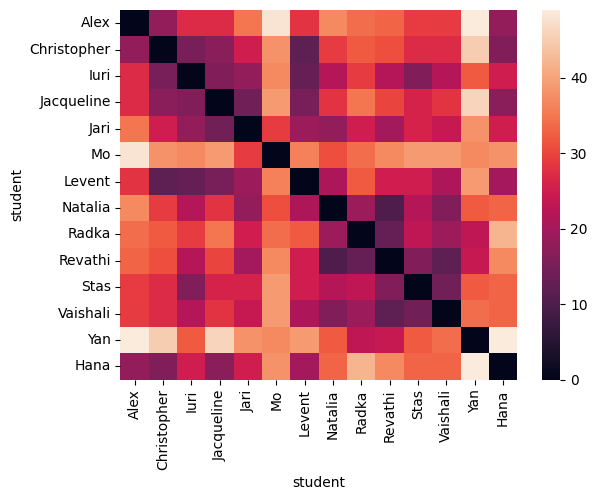

In [40]:
from sklearn.metrics import pairwise

e_dist = pd.DataFrame(pairwise.manhattan_distances(df), index=df.index, columns=df.index)
sns.heatmap(e_dist)

# Songs

## import df

In [41]:
songs_df = pd.read_csv("df_audio_features_10.csv")

In [42]:
songs_df.sort_values(by="energy")

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
1,The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
7,In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...


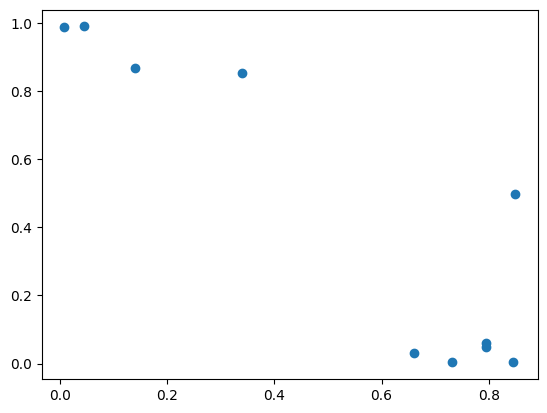

In [43]:
plt.scatter(songs_df.energy,songs_df.acousticness)

## manual Calc euclidean distances

<AxesSubplot:>

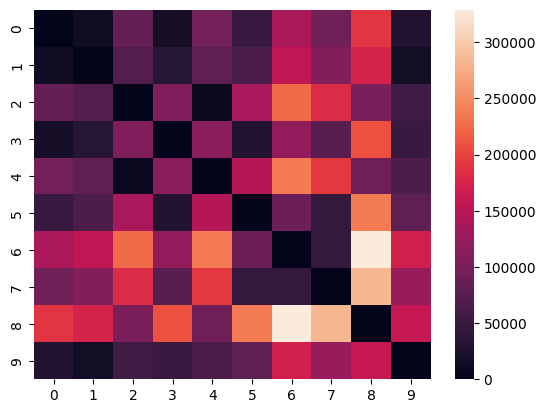

In [54]:
cols_exclude = 4
all_distances = []
for song_a in songs_df.index:
    song_a_specs = []
    for i in range(len(songs_df.columns)- cols_exclude):
        song_a_specs.append(songs_df.loc[song_a, songs_df.columns[i+2]])

    song_a_dis =[]
    for song_b in songs_df.index:
        song_b_specs = []
        for i in range(len(songs_df.columns)- cols_exclude):
            song_b_specs.append(songs_df.loc[song_b, songs_df.columns[i+2]])
        squares = [(song_a_specs[i] - song_b_specs[i])**2 for i in range(len(songs_df.columns)- cols_exclude)]
        e_dist = sum(squares)**0.5
        song_a_dis.append(e_dist)
    all_distances.append(song_a_dis)

euclidean_df = pd.DataFrame(all_distances, index=songs_df.index, columns=songs_df.index)
sns.heatmap(euclidean_df)

In [56]:
#reduced Features
songs_red_df = songs_df.drop(["song_name","artist","danceability","key","mode","instrumentalness","liveness","valence","duration_ms","time_signature","id","html"],axis=1)

<AxesSubplot:>

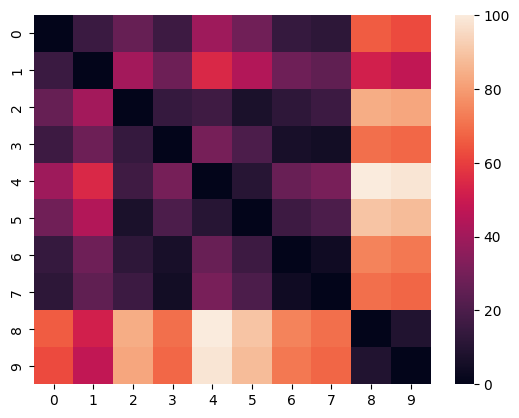

In [57]:
all_distances = []
for song_a in songs_red_df.index:
    song_a_specs = []
    for i in range(len(songs_red_df.columns)):
        song_a_specs.append(songs_red_df.loc[song_a, songs_red_df.columns[i]])

    song_a_dis =[]
    for song_b in songs_red_df.index:
        song_b_specs = []
        for i in range(len(songs_red_df.columns)):
            song_b_specs.append(songs_red_df.loc[song_b, songs_red_df.columns[i]])
        squares = [(song_a_specs[i] - song_b_specs[i])**2 for i in range(len(songs_red_df.columns))]
        e_dist = sum(squares)**0.5
        song_a_dis.append(e_dist)
    all_distances.append(song_a_dis)

euclidean_df = pd.DataFrame(all_distances, index=songs_red_df.index, columns=songs_red_df.index)
sns.heatmap(euclidean_df)